<a href="https://colab.research.google.com/github/gabrielrflopes/Estudos/blob/main/IBM_ML0101EN_CO2_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM - ML0101EN
<h3>Machine Learning with Python

## Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

%matplotlib inline

## Importando os dados

In [ ]:
data_path = 'https://raw.githubusercontent.com/gabrielrflopes/estudos/main/datasets/FuelConsumptionCo2.csv'

In [ ]:
df = pd.read_csv(data_path)

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


O dataset contém dados sobre o consumo de combustível e emissões de CO2 de modelos específicos de veículos leves do Canadá.

### Dicionário de Variáveis

- `MODELYEAR` - Ano de fabricação do veículo;
- `MAKE` - Montadora;
- `MODEL` - Modelo do veículo;
- `VEHICLECLASS` - Classe do veículo, e.g compacto, SUV;
- `ENGINESIZE` - Tamanho do motor;
- `CYLINDERS` - Quantidade de cilíndros;
- `TRANSMISSION`- Tipo de embreagem;
- `FUELTYPE`- Tipo de combustível;
- `FUELCONSUMPTION_CITY` - Consumo de combustível na cidade;
- `FUELCONSUMPTION_HWY` - Consumo de combustível na estrada;
- `FUELCONSUMPTION_COMB` - Média do consumo de combustível;
- `FUELCONSUMPTION_COMB_MPG` - Média de milhas por galão de combustível;
- `CO2EMISSIONS`- Emissões de CO2

## Análise exploratória dos dados

- **Dimensões do dataset**

In [ ]:
print('Entradas:\t', df.shape[0],
      '\nVariáveis:\t', df.shape[1])

Entradas:	 1067 
Variáveis:	 13


- **Análise dos tipos das variáveis**

In [ ]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

- **Valores ausentes**

In [ ]:
nan_pct = df.isna().sum() / df.__len__() * 100

if nan_pct.max() == 0:
  print('Não há valores ausentes')
else:
  print(nan_pct)

Não há valores ausentes


- **Explorando os valores únicos das variáveis categóricas**

A análise de valores únicos servirá para ter uma noção de o que cada variável avalia, além de servir para notar se existe alguma entrada inválida que não foi contada entre os valores ausentes.

In [ ]:
print('Quantidade de valores únicos por variável categórica:\n')
df.select_dtypes('object').nunique()

Quantidade de valores únicos por variável categórica:



MAKE             39
MODEL           663
VEHICLECLASS     16
TRANSMISSION     22
FUELTYPE          4
dtype: int64

In [ ]:
df['MAKE'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [ ]:
df['VEHICLECLASS'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [ ]:
df['TRANSMISSION'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

In [ ]:
df['FUELTYPE'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

- **Sumário estatístico das variáveis numéricas**

In [ ]:
df.describe().round(2)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00
mean,2014.0,3.35,5.79,13.30,9.47,11.58,26.44,256.23
std,0.0,1.42,1.80,4.10,2.79,3.49,7.47,63.37
min,2014.0,1.00,3.00,4.60,4.90,4.70,11.00,108.00
25%,2014.0,2.00,4.00,10.25,7.50,9.00,21.00,207.00
50%,2014.0,3.40,6.00,12.60,8.80,10.90,26.00,251.00
75%,2014.0,4.30,8.00,15.55,10.85,13.35,31.00,294.00
max,2014.0,8.40,12.00,30.20,20.50,25.80,60.00,488.00


###  Visualizando os dados

- **Histogramas**

Vamos selecionar alguns atributos interessantes para nossa análise, bem como a variável-alvo `CO2EMISSIONS`, para visualizar suas distribuições em histogramas.

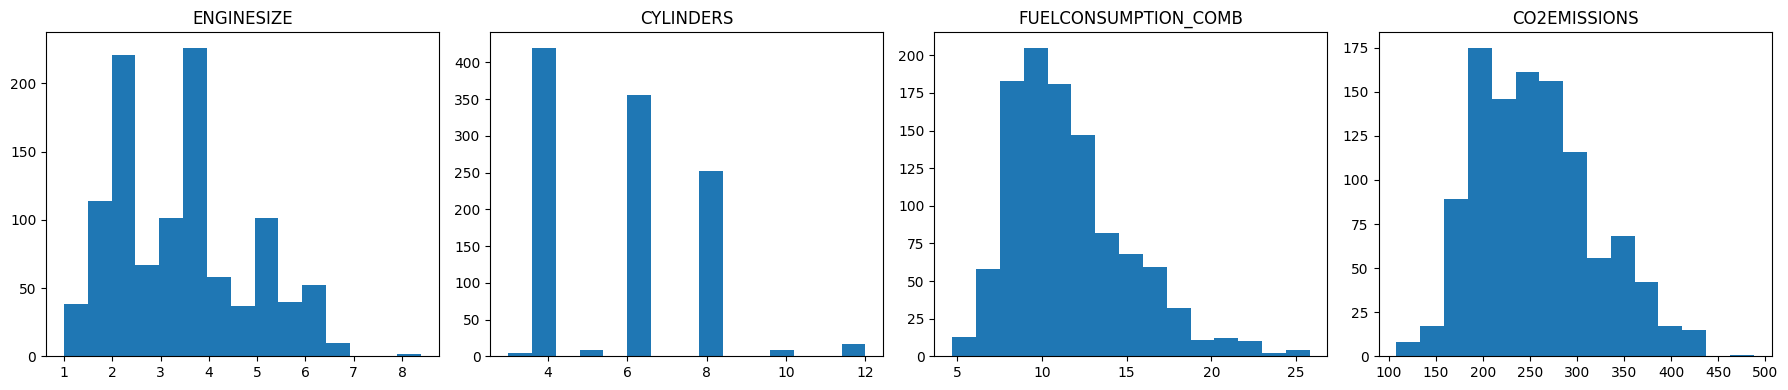

In [ ]:
fig,ax = plt.subplots(1, 4, figsize = (18, 4))

df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']].hist(ax = ax, grid = False, bins = 15);

fig.tight_layout()
fig.show()

- **Gráficos de dispersão com a variável-alvo**

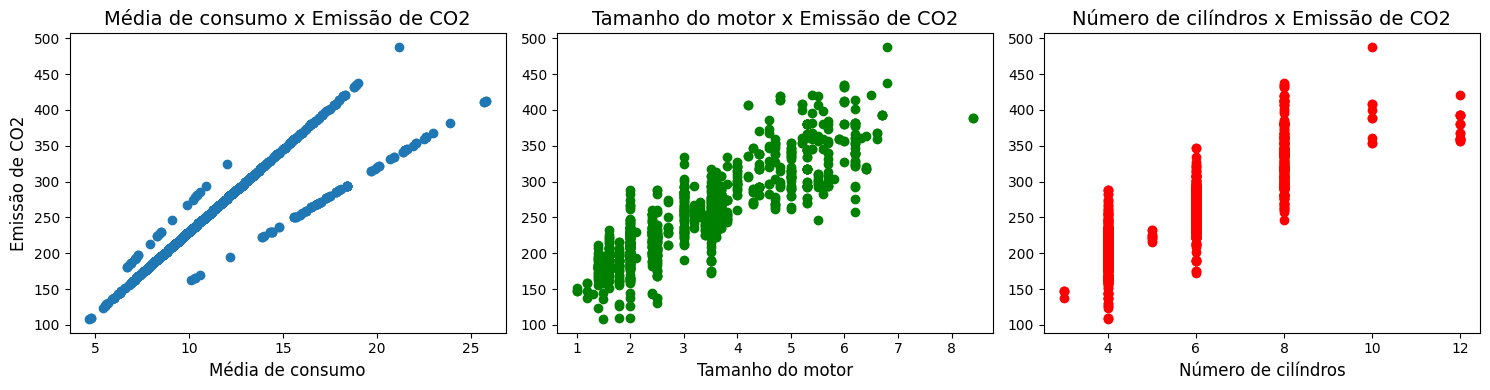

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (15, 4))

ax[0].scatter(x = 'FUELCONSUMPTION_COMB', y = 'CO2EMISSIONS', data = df);
ax[1].scatter(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data = df, color = 'g');
ax[2].scatter(x = 'CYLINDERS', y = 'CO2EMISSIONS', data = df, color = 'r')

ax[0].set_title('Média de consumo x Emissão de CO2', fontsize = 14)
ax[0].set_xlabel('Média de consumo', fontsize = 12)
ax[0].set_ylabel('Emissão de CO2', fontsize = 12)

ax[1].set_title('Tamanho do motor x Emissão de CO2', fontsize = 14)
ax[1].set_xlabel('Tamanho do motor', fontsize = 12)

ax[2].set_title('Número de cilíndros x Emissão de CO2', fontsize = 14)
ax[2].set_xlabel('Número de cilíndros', fontsize = 12)

fig.tight_layout()
fig.show()

## Modelo de regressão linear para a variável `ENGINESIZE`

- **Importando as bibliotecas necessárias**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

- **Separando as variáveis independente e dependente**

In [ ]:
X = np.array(df['ENGINESIZE']).reshape(-1, 1)
y = df['CO2EMISSIONS']

- **Dividindo os conjuntos de teste e treino**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print('Dimensão do conjunto original:', df.shape)

print('\nDimensões dos conjuntos de treino e teste',
      '\nX_train:', X_train.shape,
      '\ny_train:', y_train.shape,
      '\nX_test:\t', X_test.shape,
      '\ny_test:\t', y_test.shape)

Dimensão do conjunto original: (1067, 13)

Dimensões dos conjuntos de treino e teste 
X_train: (853, 1) 
y_train: (853,) 
X_test:	 (214, 1) 
y_test:	 (214,)


In [ ]:
#Instanciar o modelo
slr = LinearRegression()

# Ajustar o modelo nos dados de treino
model_slr = slr.fit(X_train, y_train)

# Realizar as previsões com o modelo
y_pred_slr = model_slr.predict(X_test)

In [ ]:
print('Coeficiente linear: {:.2f}'.format(model_slr.coef_[0]),
      '\nIntercepto: {:.2f}'.format(model_slr.intercept_))

Coeficiente linear: 38.99 
Intercepto: 126.29


Portanto, o modelo linear ajustou uma reta que pode ser expressa como:

$$ \text{Emissões de CO2} = 126.29 + 38.99x $$

em que _x_ se refere ao atributo `ENGINESIZE`.

### **Visualizando o modelo ajustado aos dados**

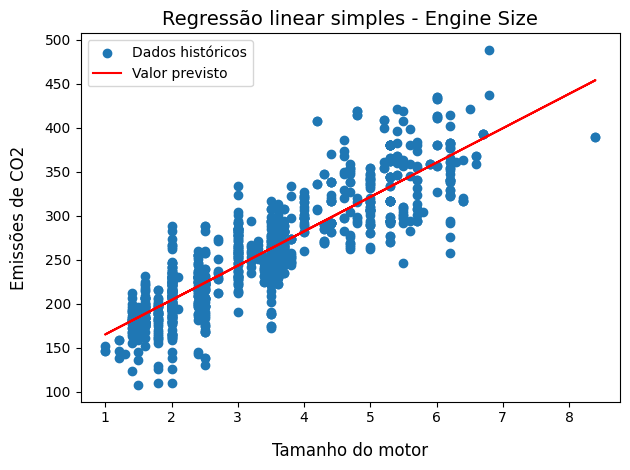

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data = df, label = 'Dados históricos');
ax.plot(X_train, model_slr.coef_[0]*X_train + model_slr.intercept_, 'r-', label = 'Valor previsto');

ax.set_title('Regressão linear simples - Engine Size', fontsize = 14)
ax.set_ylabel('Emissões de CO2', fontsize = 12, labelpad = 12)
ax.set_xlabel('Tamanho do motor', fontsize = 12, labelpad = 12)

ax.legend()

fig.tight_layout()
fig.show()

### Avaliando métricas

In [ ]:
print('Erro absoluto médio: {:.2f}'.format(mean_absolute_error(y_test, y_pred_slr)))
print('Erro quadrático médio: {:.2f}'.format(mean_squared_error(y_test, y_pred_slr)))
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred_slr)))

Erro absoluto médio: 24.10
Erro quadrático médio: 985.94
R2 score: 0.76


## Modelo de regressão linear para o atributo `FUELCONSUMPTION_COMB`

In [ ]:
X = np.array(df['FUELCONSUMPTION_COMB']).reshape(-1, 1)
y = df['CO2EMISSIONS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print('Dimensão do conjunto original:', df.shape)

print('\nDimensões dos conjuntos de treino e teste',
      '\nX_train:', X_train.shape,
      '\ny_train:', y_train.shape,
      '\nX_test:', X_test.shape,
      '\ny_test:', y_test.shape)

Dimensão do conjunto original: (1067, 13)

Dimensões dos conjuntos de treino e teste 
X_train: (853, 1) 
y_train: (853,) 
X_test: (214, 1) 
y_test: (214,)


In [ ]:
# Ajustando o modelo
model2_slr = slr.fit(X_train, y_train)

# Realizando as previsões
y2_pred_slr = model2_slr.predict(X_test)

In [ ]:
print('Coeficiente linear:', model2_slr.coef_[0].round(2),
      '\nIntercepto:', model2_slr.intercept_.round(2))

Coeficiente linear: 16.49 
Intercepto: 65.62


### Visualizando o modelo ajustado aos dados

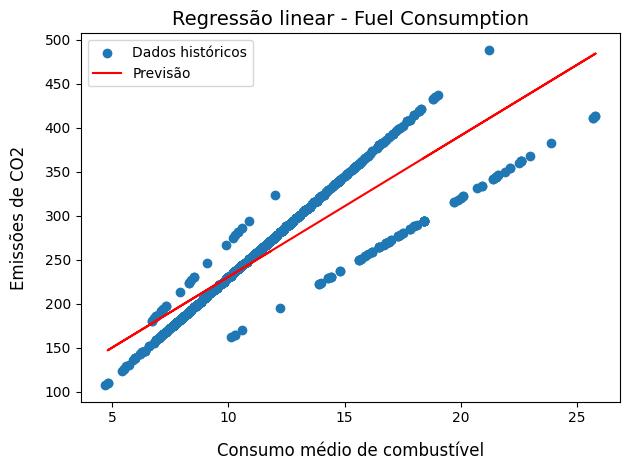

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x = 'FUELCONSUMPTION_COMB', y = 'CO2EMISSIONS', data = df, label = 'Dados históricos');
ax.plot(X_train, 16.04*X_train + 70.17, 'r-', label = 'Previsão');

ax.set_title('Regressão linear - Fuel Consumption', fontsize = 14)
ax.set_ylabel('Emissões de CO2', fontsize = 12, labelpad = 12)
ax.set_xlabel('Consumo médio de combustível', fontsize = 12, labelpad = 12)
ax.legend()

fig.tight_layout()
fig.show()

### Avaliando as métricas

In [ ]:
print('Erro absoluto médio: {:.2f}'.format(mean_absolute_error(y_test, y2_pred_slr)))
print('Erro quadrático médio: {:.2f}'.format(mean_squared_error(y_test, y2_pred_slr)))
print('R2 Score: {:.2f}'.format(r2_score(y_test, y2_pred_slr)))

Erro absoluto médio: 21.52
Erro quadrático médio: 951.96
R2 Score: 0.77


As métricas de desempenho para a variável de consumo médio mostram que esse atributo é bom na previsão da emissão de CO2 do combustível, obtendo um R2 Score por volta de 0,8 e um MSE baixo.

## Modelo de regressão linear para a variável `CYLINDERS`

In [ ]:
X = np.array(df['CYLINDERS']).reshape(-1, 1)
y = df['CO2EMISSIONS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Instanciando o modelo
model3_slr = slr.fit(X_train, y_train)

# Realilzando as previsões
y3_pred_slr = model3_slr.predict(X_test, )

In [ ]:
print('Coeficiente linear: {:.2f}'.format(model3_slr.coef_[0]),
      '\nIntercepto: {:.2f}'.format(model3_slr.intercept_))

Coeficiente linear: 30.02 
Intercepto: 82.41


### Visualizando o modelo ajustado aos dados

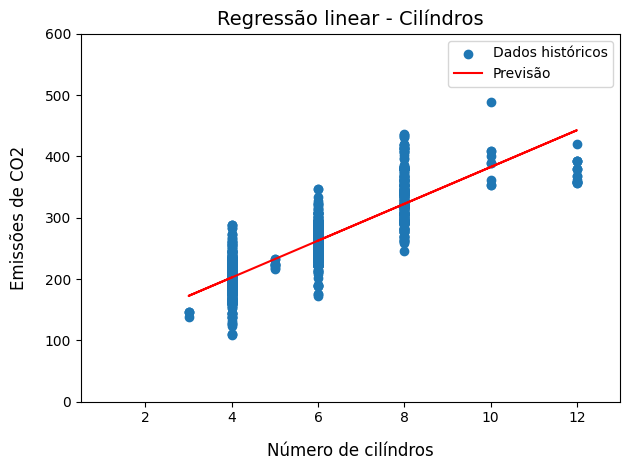

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x = 'CYLINDERS', y = 'CO2EMISSIONS', data = df)
ax.plot(X_train, model3_slr.coef_[0]*X_train + model3_slr.intercept_, 'r-')

ax.set_xlabel('Número de cilíndros', fontsize = 12, labelpad = 12)
ax.set_ylabel('Emissões de CO2', fontsize = 12, labelpad = 12)
ax.set_title('Regressão linear - Cilíndros', fontsize = 14)
ax.set_xlim(.5, 13)
ax.set_ylim(0, 600)
ax.legend(labels = ['Dados históricos', 'Previsão'])

fig.tight_layout()
fig.show()

### Avaliando as métricas de desempenho

In [ ]:
print('Erro absoluto médio: {:.2f}'.format(mean_absolute_error(y_test, y3_pred_slr)))
print('Erro quadrático médio: {:.2f}'.format(mean_squared_error(y_test, y3_pred_slr)))
print('R2 Score: {:.2f}'.format(r2_score(y_test, y3_pred_slr)))

Erro absoluto médio: 24.13
Erro quadrático médio: 994.50
R2 Score: 0.74


O modelo linear simples funcionou relativamente bem para a variável `CYLINDERS`. Note que o valor de R2 está por volta de 0.7, o que é uma boa marca. Além disso, o erro quadrático médio não difere muito daquele encontrado para o primeiro modelo aplicado à variável `ENGINESIZE`.

## Regressão Linear Múltipla

Avaliando os três primeiros modelos criados a partir das variáveis individuais, tentando prever a variável-alvo, podemos ver que todas elas apresentam informações que ajudam na previsão da emissão de CO2 por um novo veículo.

Sendo assim, agora vamos implementar um modelo de regressão linear múltipla, em que vamos utilizar as três variáveis `ENGINESIZE`, `FUELCONSUMPTION_COMB` e `CYLINDERS` para estimar a emissão de CO2. Dessa forma, o modelo terá mais atributos informativos para trabalhar, fornecendo o peso relativo para cada variável, isto é, a importância relativa entre elas para a previsão de quantidade de CO2 emitido por um novo veículo.

In [ ]:
# Definindo a matriz de atributos e a variável-alvo
X = df[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

In [ ]:
print('Dimensões da matriz de atributos e da variável-alvo',
      '\nX:', X.shape,
      '\ny:', y.shape)

Dimensões da matriz de atributos e da variável-alvo 
X: (1067, 3) 
y: (1067,)


In [ ]:
# Dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Instanciando o modelo
mlr = LinearRegression()

# Realizando o ajuste
model_mlr = mlr.fit(X_train, y_train)

# Realizando as previsões
y_pred_mlr = model_mlr.predict(X_test)

In [ ]:
print('Coeficientes:', model_mlr.coef_.round(2),
      '\nIntercepto:', model_mlr.intercept_.round(2))

Coeficientes: [ 7.51 10.89  9.77] 
Intercepto: 63.31


Note, a partir dos coeficientes, que o modelo atribuiu diferentes pesos para cada uma das variáveis, segundo sua importância na previsão do alvo. Seguindo a ordem estabelecida quando definimos a variável X, o tamanho do motor tem o maior peso na previsão das emissões de CO2, segundo esse modelo.

Explicitamente, o modelo de regressão linear múltipla pode ser descrito com a seguinte equação:

$$ f(x_1, x_2, x_3) = 6.6x_1 + 12.31x_2 + 9.49x_3 + 67.18$$

Em que $x_1$, $x_2$ e $x_3$ correspondem às variáveis `CYLINDERS`, `ENGINESIZSE`e `FUELCONSUMPTION_COMB`, respectivamente.

### Avaliando as métricas de desempenho

In [ ]:
print('Erro absoluto médio: {:.2f}'.format(mean_absolute_error(y_test, y_pred_mlr)))
print('Erro quadrático médio: {:.2f}'.format(mean_squared_error(y_test, y_pred_mlr)))
print('R2 Score: {:.2f}'.format(r2_score(y_test, y_pred_mlr)))

Erro absoluto médio: 17.20
Erro quadrático médio: 560.37
R2 Score: 0.85


Note como a qualidade do modelo melhorou muito quando utilizamos mais variáveis independentes para prever o alvo. A métrica R2 Score passou a valer aproximadamente 0.85 e o erro quadrático médio diminuiu por volta de 550. Na regressão linear, o melhor valor obtido com relação ao MSE foi de 985.94.

### Testando variações

No modelo acima, utilizamos a média do consumo de combustível como variável independente. Agora, queremos fazer uma variação: ao invés de usar a média, vamos usar os dados referentes ao consumo na cidade e na estrada.

In [ ]:
X = df[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']]
y = df['CO2EMISSIONS']

In [ ]:
print('X:', X.shape,
      '\ny:', y.shape)

X: (1067, 4) 
y: (1067,)


In [ ]:
# Dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Ajustando o modelo
model2_mlr = mlr.fit(X_train, y_train)

# Realizando as previsões
y2_pred_mlr = model2_mlr.predict(X_test)

In [ ]:
print('Coeficientes:', model2_mlr.coef_.round(2),
      '\nIntercepto:', model2_mlr.intercept_.round(2))

Coeficientes: [ 7.62 10.69  4.06  5.53] 
Intercepto: 64.59


### Avaliando as métricas de desempenho

In [ ]:
print('Erro absoluto médio: {:.2f}'.format(mean_absolute_error(y_test, y2_pred_mlr)))
print('Erro quadrático médio: {:.2f}'.format(mean_squared_error(y_test, y2_pred_mlr)))
print('R2 Score: {:.2f}'.format(r2_score(y_test, y2_pred_mlr)))

Erro absoluto médio: 17.54
Erro quadrático médio: 566.76
R2 Score: 0.85


Aumentando o número de atributos informativos para 4, com as informações de consumo de combustível na cidade e na estrada, conseguimos melhorar o desempenho do modelo de regressão linear múltipla. O R2 Score aumentou por volta de 0.03.

## Regressão polinomial

A regressão polinomial busca ajustar uma curva aos dados, supondo que estes tenham uma natureza não-linear. Na regressão polinomial, nota-se que relação das variáveis dependente e a independente pode ser modelada por um polinômio de grau n, com n sendo um número inteiro que denota se tal relação é quadrática, cúbica, quaternária, etc.

Uma equação que representaria um modelo de regressão polinomial seria:

$$ f(x) = \theta_0 + \theta_1x + \theta_2x^2 $$

É importante notar que, na regressão polinomial, a função que prediz as variáveis é linear com relação aos parâmetros $\theta_i$. Ou seja, não existe nenhuma combinação ou operação não-linear envolvendo esses parâmetros.

A partir dessa exposição, como podemos ajustar uma regressão polinomial aos dados do conjunto de previsão de CO2?

Pegue, por exemplo, a variável `ENGINESIZE`, que apresenta apenas valores lineares em X. Podemos utilizar o método `PolynomialFeatures()` para, a partir de um atributo, criar k novos atributos que correspondem, cada um, a um grau de polinômio aplicado aos dados do atributo original.

Em outras palavras, se para a variável `ENGINESIZE` queremos avaliar o seu desempenho num modelo quadrático, então aplicaríamos a transformação `PolynomialFeatures(degree = 2)`. O método transformaria o atributo original em 3 novos atributos, cada um correspondendo a um grau menor ou igual àquele que foi especificado, neste caso 0, 1 e 2.

$$
\begin{bmatrix}
    v_1\\\\
    v_2\\\\
    \vdots\\\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\\\
    [ 1 & v_2 & v_2^2]\\\\
    \vdots & \vdots & \vdots\\\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$




$$
\begin{bmatrix}
    2.\\\\
    2.4\\\\
    1.5\\\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\\\
    [ 1 & 2.4 & 5.76]\\\\
    [ 1 & 1.5 & 2.25]\\\\
    \vdots & \vdots & \vdots\\\\
\end{bmatrix}
$$

Teríamos assim múltiplas variáveis que podem ser modeladas a partir de uma Regressão Linear Múltipla. Neste processo, porém, temos que cada uma das variáveis que compõem o modelo de MLR correspondem a um grau distinto dos valores para a mesma variável. Ou seja, estamos considerando $x$ como sendo $x_1$ e $x^2$ como sendo $x_2$, enquanto mantemos os parâmetros $\theta$ lineares com relação à $f(x)$. A equação resultante pode ser descrita como:

$$ f(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$$

Agora, podemos lidar com o problema como se fosse uma regressão linear sobre as variáveis $x_1$ e $x_2$. De fato, esse tipo de Regressão Polinomial é considerado um caso especial da Regressão Linear Múltipla.

In [ ]:
# Importando as bibliotecas
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Definindo as variáveis independente e dependente
X = np.array(df['ENGINESIZE']).reshape(-1, 1)
y = df['CO2EMISSIONS']

In [ ]:
# Instanciando o transformador
poly = PolynomialFeatures(degree = 3)

# Dividindo os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Transformando os dados de treino
polyX_train = poly.fit_transform(X_train)

In [ ]:
polyX_train

array([[ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  3.7  , 13.69 , 50.653],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.5  , 12.25 , 42.875],
       [ 1.   ,  3.4  , 11.56 , 39.304],
       [ 1.   ,  3.5  , 12.25 , 42.875]])

Note que o resultado da transformação é um array com três colunas, correspondendo respectivamente aos graus 0, 1, 2 e 3.

In [ ]:
# Instanciando o modelo
mlr_poly = LinearRegression()

# Ajustando o modelo
mlr_poly.fit(polyX_train, y_train)

# Coeficientes e intercepto
print(f'Coeficientes: {mlr_poly.coef_.round(2)}',
      f'Intercepto:{mlr_poly.intercept_.round(2)}')

Coeficientes: [ 0.   32.44  3.69 -0.45] Intercepto:126.32


A partir dos resultados dos **coeficientes** e do **intercepto**, vemos que o modelo ajustou a seguinte função:

$$ \text{CO2 Emissions(Engine Size)} = 126.32 + 32.44x + 3.69x^2 - 0.45x^3 $$

- **Visualizando a curva resultante**

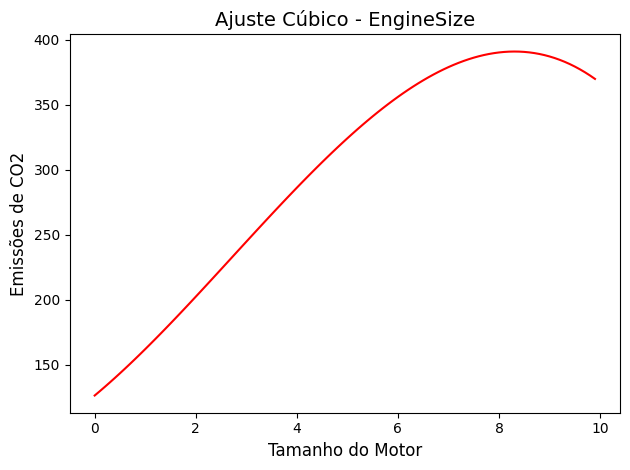

In [ ]:
fig, ax = plt.subplots()

x = np.arange(0, 10, 0.1)
y = mlr_poly.intercept_ + mlr_poly.coef_[1] * x + mlr_poly.coef_[2] * x ** 2 + mlr_poly.coef_[3] * x ** 3

ax.plot(x, y, 'r-')

ax.set_title('Ajuste Cúbico - EngineSize', fontsize = 14)
ax.set_xlabel('Tamanho do Motor', fontsize = 12)
ax.set_ylabel('Emissões de CO2', fontsize = 12)

fig.tight_layout()
fig.show()

- **Avaliando no conjunto de testes**

In [ ]:
from sklearn.metrics import r2_score

# Transformar o conjunto de testes
polyX_test = poly.transform(X_test)

# Realizar as previsões
ypoly_pred = mlr_poly.predict(polyX_test)

# Métricas
print(f'MAE:\t {mean_absolute_error(y_test, ypoly_pred):.2f}',
      f'\nMSE:\t {mean_squared_error(y_test, ypoly_pred):.2f}',
      f'\nR2:\t {r2_score(y_test, ypoly_pred):.2f}')

MAE:	 21.17 
MSE:	 748.85 
R2:	 0.81


Avaliando as métricas, vemos que o ajuste polinomial do modelo sobre a variável `ENGINESIZE` resultou em um valor muito bom para o _R2 Score_, de aproximadamente 0,81. O MSE também melhorou se comparado ao modelo puramente linear.